## Problem Statement - BoomBikes Case Study
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## 1. Reading and Understanding the data
Lets us import the libraries and read the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

#importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing rsquare
from sklearn.metrics import r2_score

In [2]:
#Read the data
boombike = pd.read_csv("~/Downloads/day.csv")

In [3]:
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#lets see the info, details and shape
boombike.shape

(730, 16)

In [5]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#As we can see, there are no null values. So we are good to go with null replace transformations
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Lets rename some of the columns
boombike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
boombike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#Lets map some variables as per the data dictionary
boombike['season']=boombike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

boombike['month']=boombike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

#As we are focusing on American market, it would be great if we can assume snow whether to match the scenario
boombike['weathersit']=boombike.weathersit.map({1: 'Clear',2:'Cloudy + Mist',3:'Light Snow',4:'Snow + Fog'})

boombike['weekday']=boombike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [9]:
boombike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Cloudy + Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Cloudy + Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# We can drop off the other variables as these cannot be used for predictions
boombike=boombike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
boombike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Cloudy + Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy + Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Step 2: Visualising the Data

Lets understand the data using some visuals
- If there is any multicoliniearity, we can see directly in the visuals
- Also we can identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

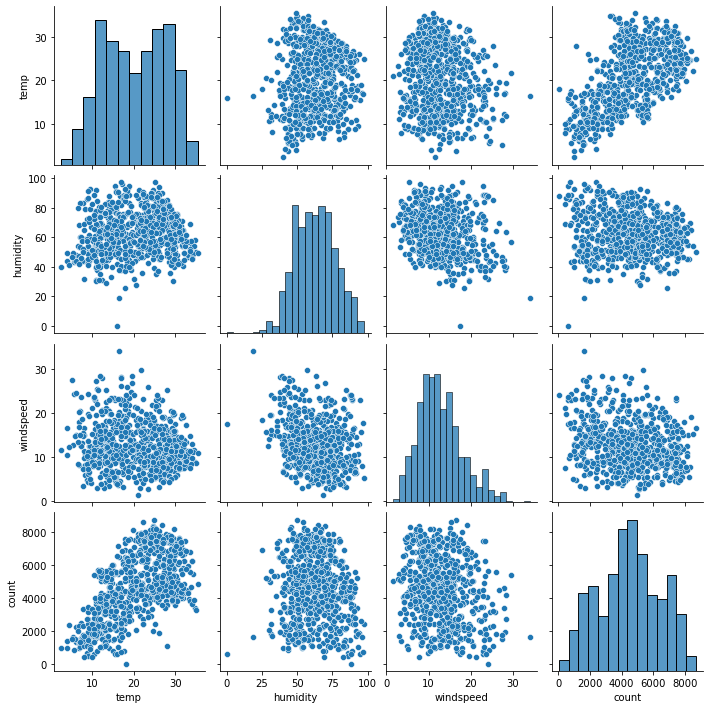

In [11]:
sns.pairplot(boombike, vars=["temp", "humidity",'windspeed','count'])
plt.show()

Conclusions:
- Independent variables are positively correlated if you see temp and count variable
- Also we can see that bike usage is high in high humidity and high temperature

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

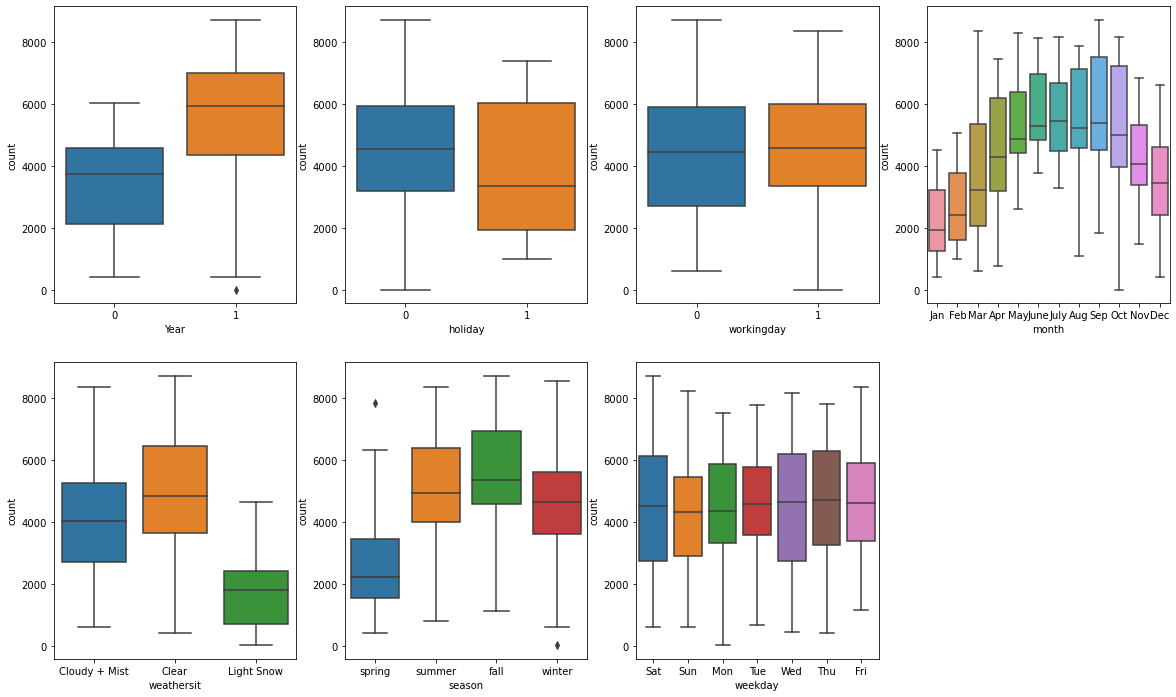

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = boombike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = boombike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = boombike)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = boombike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = boombike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = boombike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = boombike)
plt.show()

We can see the below conclusion from the above box plots:
- The usage of the bikes are more in 2019 compared to 2018
- We can see the highest usage of the bikes in fall season
- Obiviously in clear weather, we can see the maximum bike usage

## Step 3: Data Preparation
In Order to fit the regression line, we need to convert the categories into numeric values.

In [13]:
#Lets see the heads
boombike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Cloudy + Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy + Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Dummy Variables


In [14]:
#We will use now dummy variables to replace the categories for season, month, weekday, weathersit as those are having categories. 
#We will use the drop_first=true to get rid of unnecessery column creations
seasons=pd.get_dummies(boombike.season,drop_first=True)

months=pd.get_dummies(boombike.month,drop_first=True)

weekdays=pd.get_dummies(boombike.weekday,drop_first=True)

weathersits=pd.get_dummies(boombike.weathersit,drop_first=True)


In [15]:
# Add the results to the original dataframe

boombike = pd.concat([seasons, months, weekdays, weathersits,boombike], axis = 1)
boombike.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sat,0,Cloudy + Mist,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sun,0,Cloudy + Mist,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [16]:
# now we can drop the categories from the data
boombike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
boombike.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Cloudy + Mist,Light Snow,Year,holiday,workingday,temp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


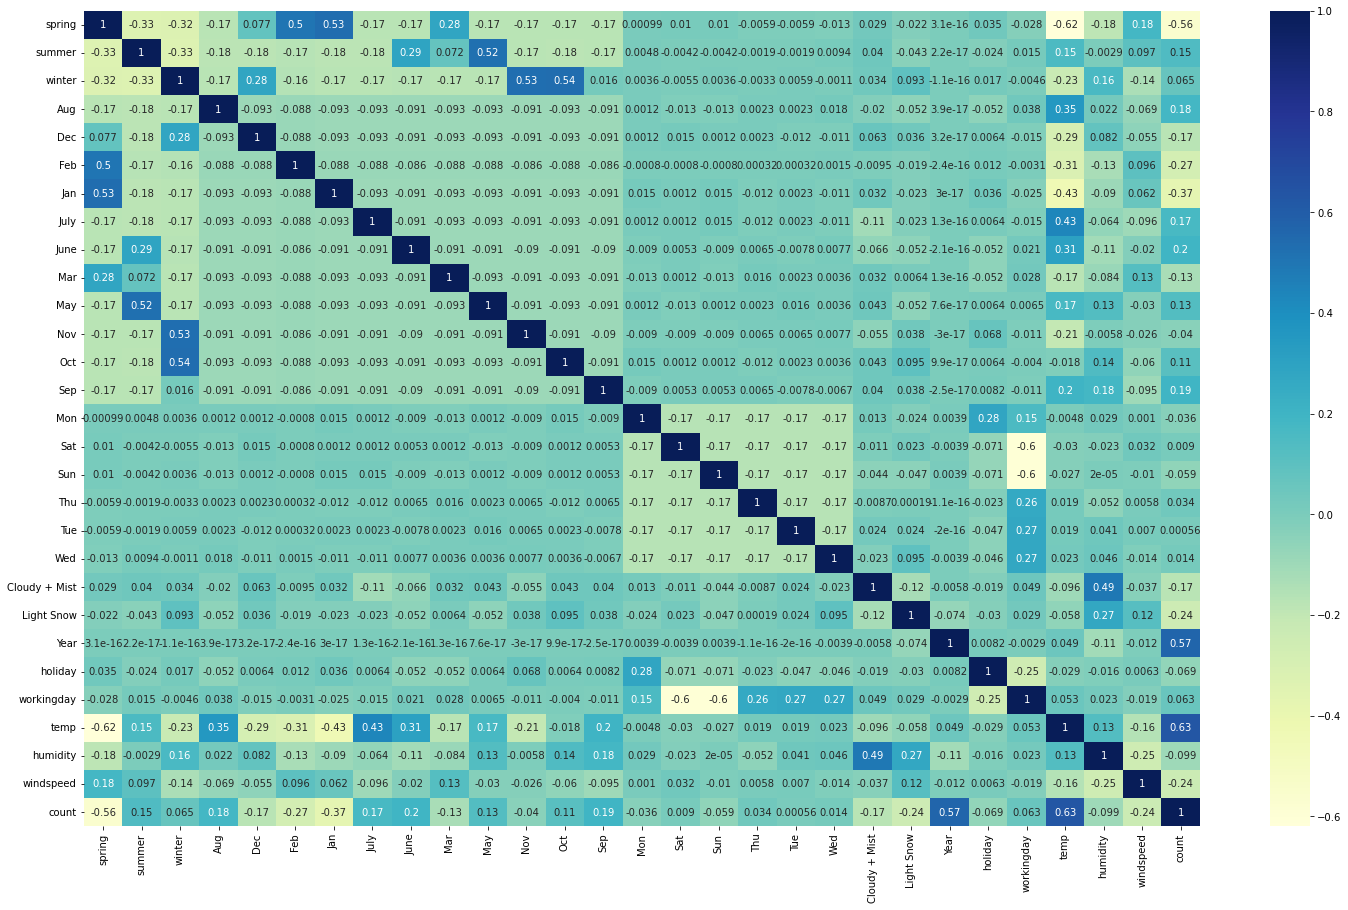

In [17]:
#Lets plot one heat map to see the correlation after adding dummy variables
plt.figure(figsize = (25, 15))
sns.heatmap(boombike.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [18]:
#Lets split train and test sets using sklearn library
np.random.seed(0)
boombike_train, boombike_test = train_test_split(boombike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
#Lets see the shape
print(boombike_test.shape)
print(boombike_train.shape)

(219, 29)
(510, 29)


### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (Normalisation = (x-xmin)/(xmax-xmin))
2. Standardisation (mean-0, sigma-1) (Standardisation= (x-mu)/ sigma)


This time, we will use MinMax scaling.

In [20]:
#Min Max Scaling. We have already imported sklearn's min max scaler
scaler = MinMaxScaler()

In [21]:
# Apply scaler() to all the columns except 'dummy' variables. We will use fit transofrm method to create the training sets
num_var = ['temp','humidity','windspeed','count']

boombike_train[num_var] = scaler.fit_transform(boombike_train[num_var])
boombike_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Cloudy + Mist,Light Snow,Year,holiday,workingday,temp,humidity,windspeed,count
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [22]:
boombike_train.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Cloudy + Mist,Light Snow,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.158824,0.343137,0.029412,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.365870,0.475223,0.169124,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


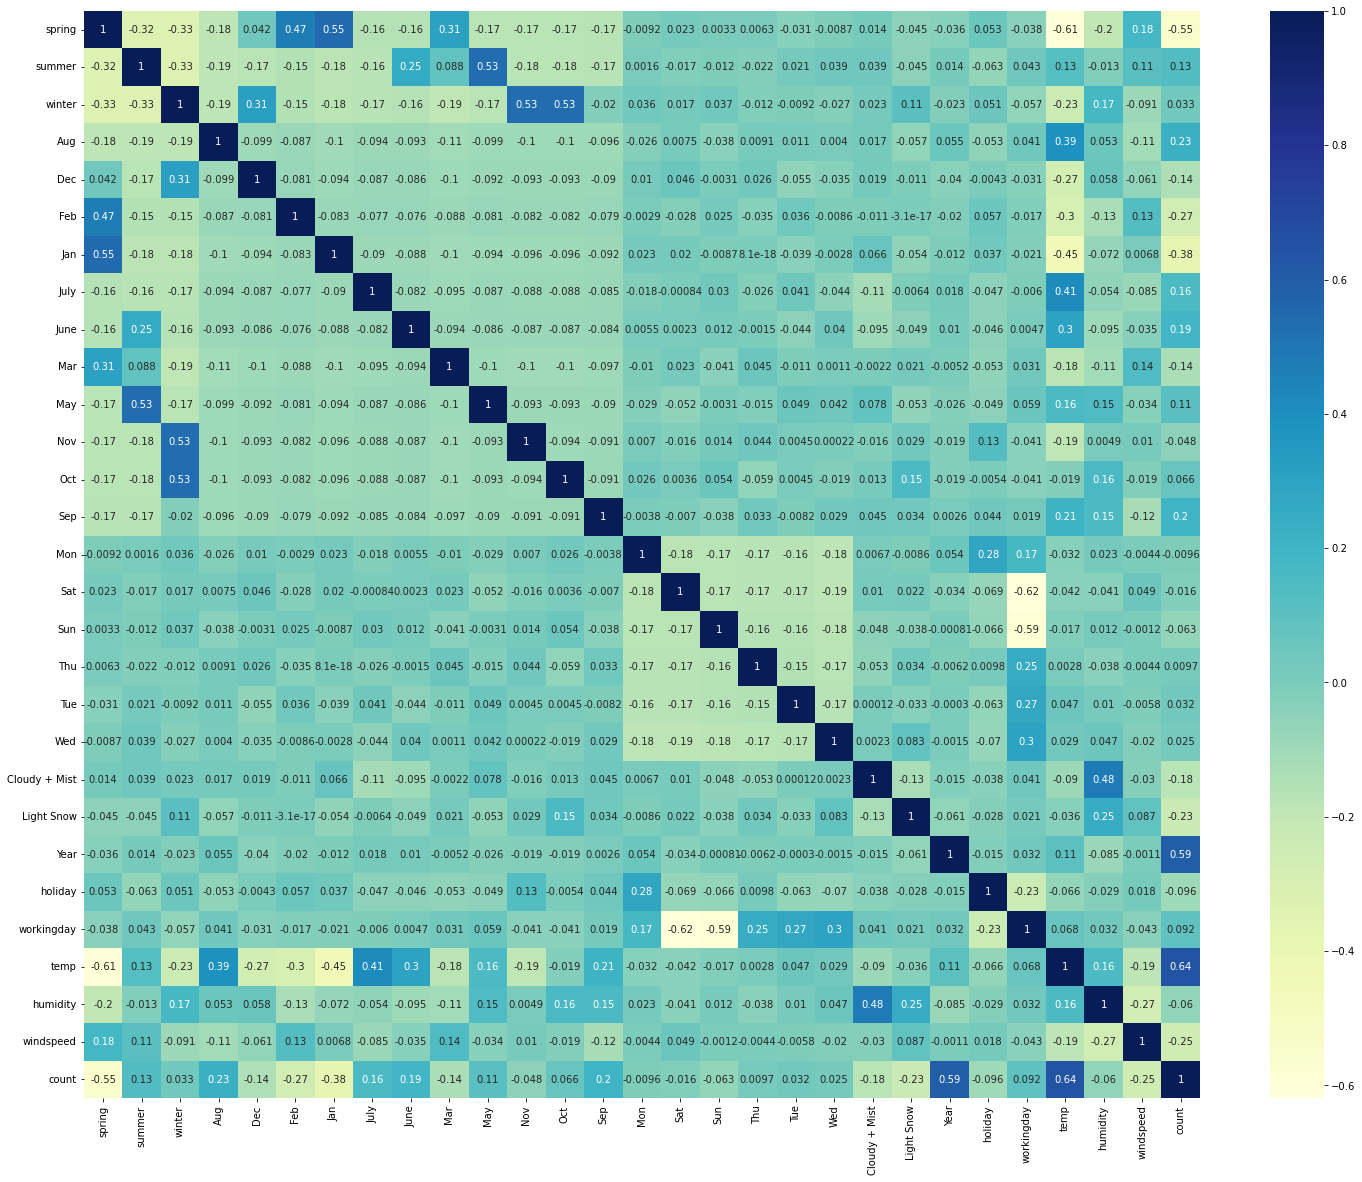

In [23]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(boombike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see the usage/count is highly correlated with Year and temperature.

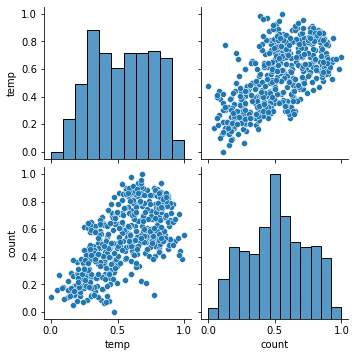

In [24]:
#Lets see pairplot for count and tem and year
sns.pairplot(boombike_train, vars=['temp','count'])
plt.show()

### Dividing into X and Y sets for the model building

In [25]:
y_train = boombike_train.pop('count')
X_train = boombike_train

## Step 5: Building a linear model

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default. We are also using RFE here.

In [26]:
#Lets see y_train and X_train first before proceeding further
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [27]:
X_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Tue,Wed,Cloudy + Mist,Light Snow,Year,holiday,workingday,temp,humidity,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0.395666,0.504508,0.188475


### Recursive Elimination Function (RFE)

In [28]:
# Lets run RFE with 20 as output vairables
lm = LinearRegression()

lm.fit(X_train, y_train)

# call RFE
rfe = RFE(lm, 20)             

rfe = rfe.fit(X_train, y_train)

In [29]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 7),
 ('Mar', False, 8),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', False, 2),
 ('Thu', False, 6),
 ('Tue', False, 4),
 ('Wed', False, 9),
 ('Cloudy + Mist', True, 1),
 ('Light Snow', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

Lets see now the RFE supported and nonsupported variables

In [30]:
#RFE Supported variables
col_rfe_support = X_train.columns[rfe.support_]
col_rfe_support

Index(['spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'May',
       'Nov', 'Sep', 'Sat', 'Cloudy + Mist', 'Light Snow', 'Year', 'holiday',
       'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [31]:
#RFE Non Supported variables
col_rfe_nonsupport = X_train.columns[~rfe.support_]
col_rfe_nonsupport

Index(['June', 'Mar', 'Oct', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

#### Building a model using statsmodel

In [32]:
# Creating X_test set with RFE selected variables
X_train_rfe = X_train[col_rfe_support]

In [33]:
#Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

#Lets create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.62e-188
Time:                        19:14:24   Log-Likelihood:                 526.45
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2904      0.041      7.163      0.000       0.211       0.370
spring           -0.0465      0.027     -1.753      0.080      -0.099       0.006
summer            0.0369      0.023      1.590      0.112      -0.009       0.083
winter            0.1099      0.023      4.868      0.000       0.066       0.154
Aug               0.0148      0.024      0.628      0.530      -0.031       0.061
Dec              -0.0499      0.018     -2.760      0.006      -0.085      -0.014
Feb              -0.0355      0.021     -1.661      0.097      -0.077       0.006
Jan              -0.0658      0.021     -3.108      0.002      -0.107      -0.024
July             -0.0407      0.025     -1.658      0.098      -0.089       0.008
May               0.0253      0.017      1.466      0.143      -0.009       0.059
Nov              -0.0474      0.019     -2.533      0.012      -0.084      -0.011
Sep               0.0802      0.021      3.753      0.000       0.038       0.122
Sat               0.0542      0.014      3.759      0.000       0.026       0.083
Cloudy + Mist    -0.0602      0.010     -5.822      0.000      -0.080      -0.040
Light Snow       -0.2556      0.026     -9.798      0.000      -0.307      -0.204
Year              0.2316      0.008     29.102      0.000       0.216       0.247
holiday          -0.0489      0.027     -1.817      0.070      -0.102       0.004
workingday        0.0441      0.011      3.854      0.000       0.022       0.067
temp              0.4483      0.038     11.711      0.000       0.373       0.523
humidity         -0.1532      0.038     -4.077      0.000      -0.227      -0.079
windspeed        -0.1867      0.025     -7.354      0.000      -0.237      -0.137
==============================================================================
Omnibus:                       83.100   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.413
Skew:                          -0.781   Prob(JB):                     1.70e-52
Kurtosis:                       5.963   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [34]:
#Need to drop the constant now
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [35]:
#Lets calculate VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,humidity,33.37
17,temp,22.20
0,spring,7.44
2,winter,5.99
1,summer,5.89
16,workingday,5.45
19,windspeed,4.94
3,Aug,3.15
7,July,2.78
6,Jan,2.42


In [36]:
#Lets drop August ,May and Feb as those are having high P values and VIF is low
X_train_rfe1 = X_train_rfe.drop(["Aug","May","Feb"], axis = 1)

#Build a model
X_train_lm1 = sm.add_constant(X_train_rfe1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          9.55e-191
Time:                        19:14:24   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2759      0.037      7.452      0.000       0.203       0.349
spring           -0.0611      0.021     -2.925      0.004      -0.102      -0.020
summer            0.0409      0.015      2.708      0.007       0.011       0.071
winter            0.1052      0.018      5.949      0.000       0.070       0.140
Dec              -0.0405      0.017     -2.351      0.019      -0.074      -0.007
Jan              -0.0458      0.018     -2.570      0.010      -0.081      -0.011
July             -0.0526      0.018     -2.932      0.004      -0.088      -0.017
Nov              -0.0420      0.018     -2.277      0.023      -0.078      -0.006
Sep               0.0732      0.017      4.404      0.000       0.041       0.106
Sat               0.0550      0.014      3.813      0.000       0.027       0.083
Cloudy + Mist    -0.0598      0.010     -5.781      0.000      -0.080      -0.039
Light Snow       -0.2571      0.026     -9.865      0.000      -0.308      -0.206
Year              0.2308      0.008     29.005      0.000       0.215       0.246
holiday          -0.0520      0.027     -1.933      0.054      -0.105       0.001
workingday        0.0445      0.011      3.889      0.000       0.022       0.067
temp              0.4750      0.036     13.038      0.000       0.403       0.547
humidity         -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed        -0.1876      0.025     -7.388      0.000      -0.237      -0.138
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [38]:
# recalculate VIF
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,humidity,31.16
14,temp,19.14
13,workingday,5.37
16,windspeed,4.78
0,spring,4.57
2,winter,4.12
1,summer,2.87
9,Cloudy + Mist,2.32
11,Year,2.09
8,Sat,2.00


###### We can remove the humidity as it is having very high VIF

In [39]:
#Lets drop August ,May and Feb as those are having high P values and VIF is low
X_train_rfe2 = X_train_lm1.drop(["humidity"], axis = 1)

#Build a model
X_train_lm2 = sm.add_constant(X_train_rfe2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.49e-188
Time:                        19:14:24   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2055      0.033      6.242      0.000       0.141       0.270
spring           -0.0701      0.021     -3.327      0.001      -0.112      -0.029
summer            0.0340      0.015      2.237      0.026       0.004       0.064
winter            0.0917      0.018      5.212      0.000       0.057       0.126
Dec              -0.0474      0.017     -2.731      0.007      -0.082      -0.013
Jan              -0.0520      0.018     -2.882      0.004      -0.087      -0.017
July             -0.0478      0.018     -2.630      0.009      -0.083      -0.012
Nov              -0.0429      0.019     -2.291      0.022      -0.080      -0.006
Sep               0.0669      0.017      3.989      0.000       0.034       0.100
Sat               0.0598      0.015      4.097      0.000       0.031       0.088
Cloudy + Mist    -0.0834      0.009     -9.751      0.000      -0.100      -0.067
Light Snow       -0.2987      0.024    -12.347      0.000      -0.346      -0.251
Year              0.2345      0.008     29.241      0.000       0.219       0.250
holiday          -0.0499      0.027     -1.827      0.068      -0.104       0.004
workingday        0.0475      0.012      4.096      0.000       0.025       0.070
temp              0.4360      0.036     12.254      0.000       0.366       0.506
windspeed        -0.1604      0.025     -6.467      0.000      -0.209      -0.112
==============================================================================
Omnibus:                       80.436   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.289
Skew:                          -0.770   Prob(JB):                     8.87e-49
Kurtosis:                       5.836   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [41]:
# recalculate VIF
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,temp,7.21
13,workingday,5.33
15,windspeed,4.72
0,spring,3.17
2,winter,3.03
1,summer,2.33
11,Year,2.08
8,Sat,1.99
6,Nov,1.81
4,Jan,1.68


###### We can now drop off the Holiday and Nov coefficients as it is insignificant

In [42]:

X_train_rfe3 = X_train_lm2.drop(["holiday","Nov"], axis = 1)

#Build a model
X_train_lm3 = sm.add_constant(X_train_rfe3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          9.35e-189
Time:                        19:14:24   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -991.8
Df Residuals:                     495   BIC:                            -928.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1792      0.032      5.603      0.000       0.116       0.242
spring           -0.0622      0.021     -2.977      0.003      -0.103      -0.021
summer            0.0404      0.015      2.674      0.008       0.011       0.070
winter            0.0807      0.017      4.703      0.000       0.047       0.114
Dec              -0.0311      0.016     -1.935      0.054      -0.063       0.000
Jan              -0.0471      0.018     -2.614      0.009      -0.083      -0.012
July             -0.0466      0.018     -2.546      0.011      -0.083      -0.011
Sep               0.0709      0.017      4.251      0.000       0.038       0.104
Sat               0.0682      0.014      4.832      0.000       0.040       0.096
Cloudy + Mist    -0.0821      0.009     -9.535      0.000      -0.099      -0.065
Light Snow       -0.2932      0.024    -12.067      0.000      -0.341      -0.245
Year              0.2345      0.008     29.028      0.000       0.219       0.250
workingday        0.0555      0.011      5.061      0.000       0.034       0.077
temp              0.4576      0.035     13.213      0.000       0.390       0.526
windspeed        -0.1622      0.025     -6.495      0.000      -0.211      -0.113
==============================================================================
Omnibus:                       80.178   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.257
Skew:                          -0.776   Prob(JB):                     1.81e-47
Kurtosis:                       5.779   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [44]:
#recalculate VIF
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,6.87
11,workingday,4.72
13,windspeed,4.66
0,spring,3.09
1,summer,2.31
2,winter,2.15
10,Year,2.08
7,Sat,1.86
4,Jan,1.67
5,July,1.59


###### We can drop off the Dec, Jan, July as those are insignificant coefficients and having high P value and low VIFs. Also we can drop off windspeed which is insignificant and also negatively correlated

In [45]:
X_train_rfe4 = X_train_lm3.drop(["Dec","Jan","July","windspeed"], axis = 1)

#Build a model
X_train_lm4 = sm.add_constant(X_train_rfe4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.55e-182
Time:                        19:14:24   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0901      0.030      2.965      0.003       0.030       0.150
spring           -0.0647      0.021     -3.049      0.002      -0.106      -0.023
summer            0.0516      0.014      3.567      0.000       0.023       0.080
winter            0.0984      0.017      5.758      0.000       0.065       0.132
Sep               0.0915      0.017      5.507      0.000       0.059       0.124
Sat               0.0647      0.015      4.380      0.000       0.036       0.094
Cloudy + Mist    -0.0800      0.009     -8.886      0.000      -0.098      -0.062
Light Snow       -0.3051      0.025    -12.064      0.000      -0.355      -0.255
Year              0.2333      0.008     27.587      0.000       0.217       0.250
workingday        0.0568      0.011      4.948      0.000       0.034       0.079
temp              0.4918      0.034     14.587      0.000       0.426       0.558
==============================================================================
Omnibus:                       77.818   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.021
Skew:                          -0.753   Prob(JB):                     4.09e-46
Kurtosis:                       5.751   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [47]:
#recalculate VIF
vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.72
8,workingday,4.63
7,Year,2.07
4,Sat,1.81
1,summer,1.74
0,spring,1.70
2,winter,1.59
5,Cloudy + Mist,1.56
3,Sep,1.23
6,Light Snow,1.07


###### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A thum rulw which commonly used in practice is if a VIF is > 10, you have high multicollinearity. For our model we have VIF less than 5. So we are good to go.

- R-squared measures the strength of the relationship between our model and the dependent variable on a 0 – 100% scale. And we have the R-square value of 82.6%

- The adjusted R-squared adjusts for the number of terms in the model. And our model calculated it as 82.3%

## Step 6: Residual Analysis of the train dataset

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [48]:
# We have our final model as X_train_lm4
X_train_lm4

,const,spring,summer,winter,Sep,Sat,Cloudy + Mist,Light Snow,Year,workingday,temp
653,1.0,0,0,1,0,0,0,0,1,1,0.509887
576,1.0,0,0,0,0,0,0,0,1,1,0.815169
426,1.0,1,0,0,0,1,1,0,1,0,0.442393
728,1.0,1,0,0,0,0,0,0,1,0,0.245101
482,1.0,0,1,0,0,1,1,0,1,0,0.395666
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,1,0,0,0,1,0,1,1,0.824514
578,1.0,0,0,0,0,0,0,0,1,1,0.863973
53,1.0,1,0,0,0,0,0,0,0,1,0.202618
350,1.0,0,0,1,0,1,1,0,0,0,0.248216


In [49]:
#lets calculated y train predicted
y_train_pred = lm4.predict(X_train_lm4)



<Figure size 432x288 with 0 Axes>

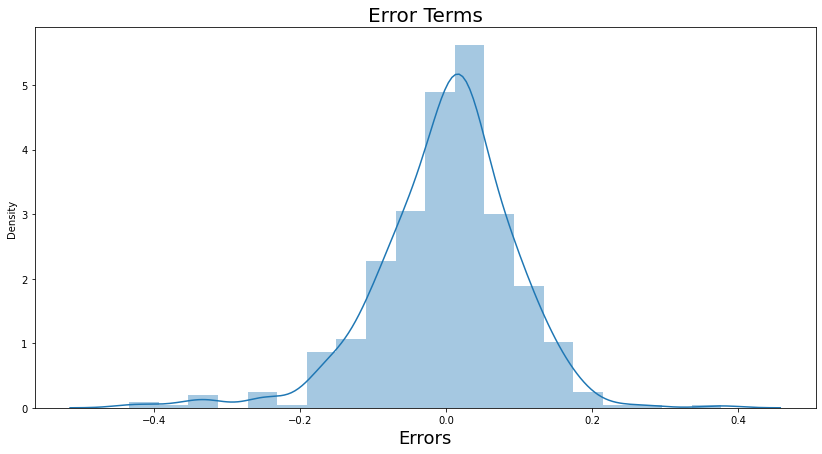

In [50]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)          
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see the normal distribution of the error terms here

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

##### Applying the scaling on the test sets

In [51]:
num_vars=['temp','humidity','windspeed','count']

boombike_test[num_vars] = scaler.transform(boombike_test[num_vars])
boombike_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Cloudy + Mist,Light Snow,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [52]:
boombike_test.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Cloudy + Mist,Light Snow,Year,holiday,workingday,temp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.100457,0.319635,0.027397,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.301297,0.467403,0.163612,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


##### Dividing into X_test and y_test

In [53]:
y_test = boombike_test.pop('count')
X_test = boombike_test


In [54]:
X_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Tue,Wed,Cloudy + Mist,Light Snow,Year,holiday,workingday,temp,humidity,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0.831783,0.657364,0.084219
535,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0.901354,0.610133,0.153728
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.511964,0.837699,0.334206
221,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.817246,0.314298,0.537414


In [55]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: count, dtype: float64

In [56]:
# Creating X_test_new dataframe by dropping variables from X_test
X_train_lm4.head()
X_test = sm.add_constant(X_test)
X_test_new = X_test[X_train_lm4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,spring,summer,winter,Sep,Sat,Cloudy + Mist,Light Snow,Year,workingday,temp
184,1.0,0,0,0,0,0,1,0,0,0,0.831783
535,1.0,0,1,0,0,0,0,0,1,1,0.901354
299,1.0,0,0,1,0,0,1,0,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,1,0,0,0,0,0,0,1,0.817246


In [57]:
# Predctions
y_pred_test = lm4.predict(X_test_new1)

#### Lets Calculate R-squared for the test sets

In [58]:
r2_score(y_test,y_pred_test)

0.8110959585457425

##### Rsquare is also pretty near to what we have in our model.
##### From the test, we received R-Square as: 0.811 and From the trained model, we received R square as 0.826. The difference is 0.015 which concludes that our model is perfectly build.


## Step 7: Model Evaluation
Let's now plot the graph for actual versus predicted values.

<Figure size 432x288 with 0 Axes>

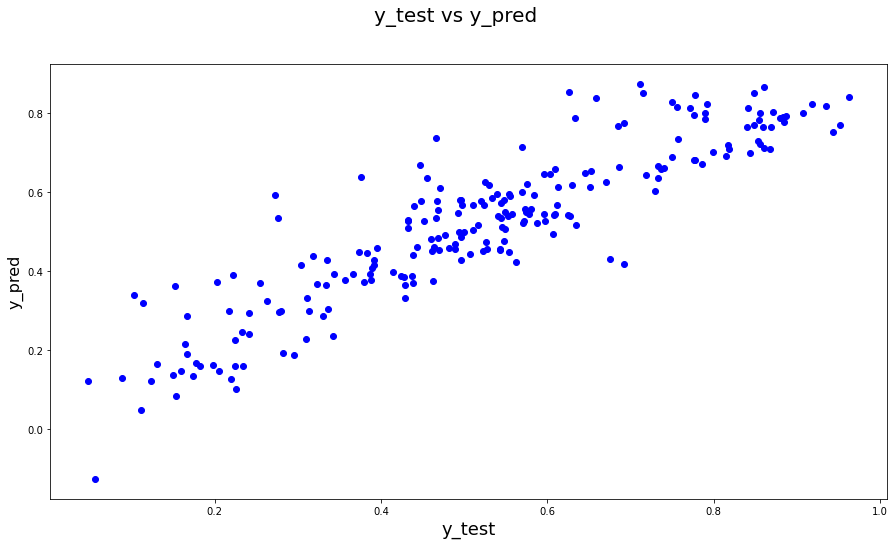

In [59]:
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred_test,color='blue')

plt.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  
plt.show()

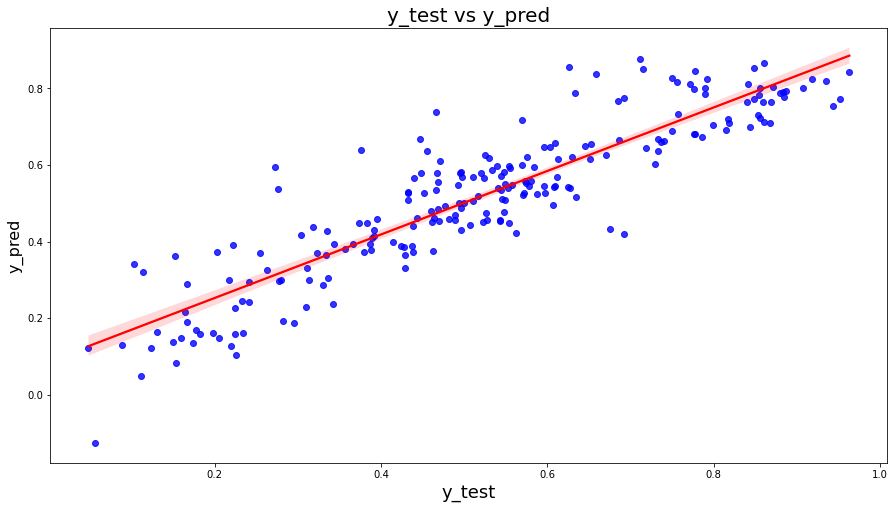

In [60]:
#Regression plot with confidence interval
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred_test, ci=90, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                         
plt.show()

#### We can see that the equation of our best fitted line is:

#### count=0.4918×Temperature+0.0915×September+0.0647×Saturday+0.0516×Summer+0.0984×Winter+0.2333×Year+0.0568×workingday−0.03051×LightSnow−0.0800×CloudyMist−0.0647×spring

### Conclusions:
   ##### US bike-sharing provider BoomBikes can focus more on Temperature as the 0.4918 coefficient plays important role in the increase of the bike usage
   ##### We can see the high number of revenues with the bike usage in 2019 compared to 2018. But company needs to observe the Corona Pandemic situation to make further decisions
   ##### Also BoomBikes can focus more on the inventory availability on Summer, Winter seasons, August and September month, Weekends and Working days as the coefficients can highly increase the usage and revenue.
   ##### We can also see the negative coefficients which affect the usage. Obiviously the LightSnow, Cloudy & Mist Environment and Spring are negatively correlated. The suggestion is if we can provide any discounts to increase the usage and so the revenue for the bikes.